# Current Account as Percent GDP

In [3]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data import COUNTRIES, get_all_data_and_labels
from indicators import *
from signal_math import *
from stats import *
from utils import *

plt.rcParams["figure.figsize"] = (10, 4)

# Initialize the data
all_data, all_labels = get_all_data_and_labels()
all_data_clean, all_labels_clean = get_all_data_and_labels(cleaned=True)

for i, label in enumerate(all_labels):
    vars()[label] = all_data[i]
    
for i, label in enumerate(all_labels_clean):
    vars()[label] = all_data_clean[i]
    
print(*all_labels, sep='\n')

# Get daily returns benchmark
bond_rets_daily = bond_rets_local_fx.pct_change()

bond_rets_local_fx
equity_prices
curr_acct_nom_usd
curr_acct_pct_gdp
fx_trd_wts_nom
fx_trd_wts_real
fx_vs_usd
fx_to_usd
gdp_nom
gdp_real
short_rates
long_rates
core_cpi_sa
m1_usd
m2_usd
m3_usd


Keep in mind what we are competing against:

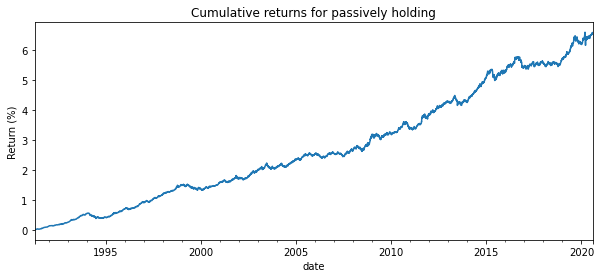

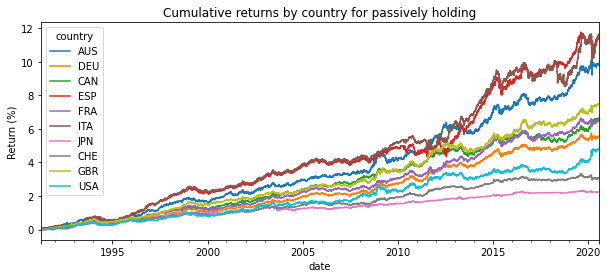

In [4]:
# Cumulative returns from holding
((1 + bond_rets_daily.dropna().mean(axis=1)).cumprod() - 1).plot(
    title='Cumulative returns for passively holding',
    ylabel='Return (%)'
)

((1 + bond_rets_daily.dropna()).cumprod() - 1).plot(
    title='Cumulative returns by country for passively holding',
    ylabel='Return (%)'
)

plt.show()

## Current Account / GDP Indicator

I implement the prospectus' component for current account over GDP:

- Compute $\Delta_{1y} \text{CurrAcct/GDP} = \text{1-year change in  CurrAcct/GDP}$ <br/><br/>

- Compute $\Delta_{4y} \text{CurrAcct/GDP} = \text{4-year change in  CurrAcct/GDP}$ <br/><br/>

- The prospectus says to "compare" the two changes. I determined that adding the two together  That is, $I = \Delta_{1y} \text{CurrAcct/GDP} - \Delta_{4y} \text{CurrAcct/GDP}$. <br/>
If $\Delta_{1y} \text{CurrAcct/GDP}$ is high relative to $\Delta_{4y} \text{CurrAcct/GDP}$, then growth should be slowing, and so interest rates may rise, and correspondingly $I$ will be bigger; and vice versa <br/><br/>

- Compute the relative indicator by subtracting the global average <br/><br/>

- Standardize that relative indicator to each country's history of the indicator



Total cumulative return: -0.005892468783357474
Cumulative return by country: country
AUS    0.129548
DEU   -0.017062
CAN    0.130892
ESP   -0.332956
FRA    0.520735
ITA   -0.441972
JPN    0.221039
CHE    0.414483
GBR   -0.190408
USA   -0.227779
dtype: float64


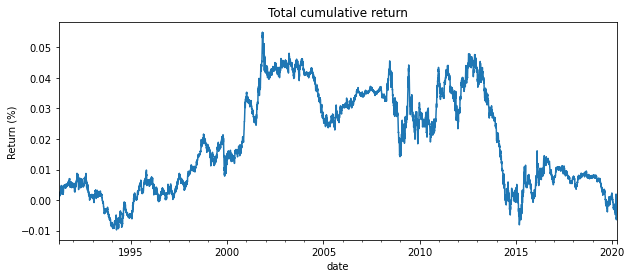

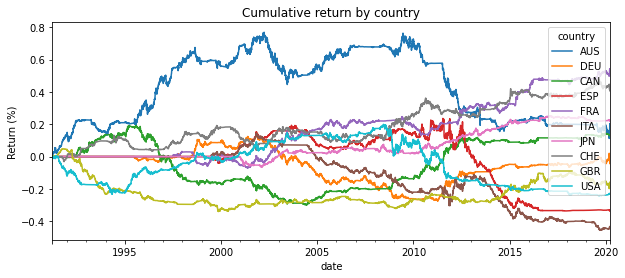

In [27]:
# Compute the signals (and indicators)
inds, sigs = test_indicator(
    curr_acct_pct_gdp_indicator,
    index=curr_acct_pct_gdp_clean.index,
    data=(curr_acct_pct_gdp_clean,)
)

# Calculate returns

total_rets, country_rets = calculate_returns(*make_comparable(sigs, bond_rets_daily))
print('Total cumulative return:', (1 + total_rets).product() - 1)
print('Cumulative return by country:', (1 + country_rets).product() - 1)

# Plot
((1 + total_rets).cumprod() - 1).plot(
    title='Total cumulative return',
    ylabel='Return (%)'
)
((1 + country_rets).cumprod() - 1).plot(
    title='Cumulative return by country',
    ylabel='Return (%)'
)

plt.show()